# Announcement-on-ML
<a href='http://www.kgptalkie.com' target="_blank"> <img src='https://github.com/laxmimerit/Important-Announcement-on-ML/raw/master/kgptalkie_strips.png'/></a>

# ML Resources
|  ML Course | Description |
|:---|:---|
| [**Deploy LLM App with Ollama and Langchain in Production**](https://www.udemy.com/course/ollama-and-langchain/?referralCode=7F4C0C7B8CF223BA9327) | Master Langchain v0.3, Private Chatbot, Deploy LLM App.  Ollama, LLAMA, LLAMA 3.2, FAISS, RAG, Deploy RAG, Gen AI, LLM|
| [**Fine Tuning LLM with HuggingFace Transformers for NLP**](https://www.udemy.com/course/fine-tuning-llm-with-hugging-face-transformers/?referralCode=6DEB3BE17C2644422D8E) | Learn how to fine tune LLM with custom dataset. You will learn basics of transformers then fine tune LLM|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Deep Learning for Beginners with Python**](https://bit.ly/dl-with-python) | Neural Networks, TensorFlow, ANN, CNN, RNN, LSTM, Transfer Learning and Much More. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |


## Chat Message Memory
- We need to store the historical chat messages in a efficient way
- It wraps another Runnable and manages the chat message history for it.
- Specifically, it loads previous messages in the conversation BEFORE passing it to the Runnable, and it saves the generated response as a message AFTER calling the runnable.
-  This class also enables multiple conversations by saving each conversation with a session_id
- it then expects a `session_id` to be passed in the config when calling the runnable, and uses that to look up the relevant conversation history

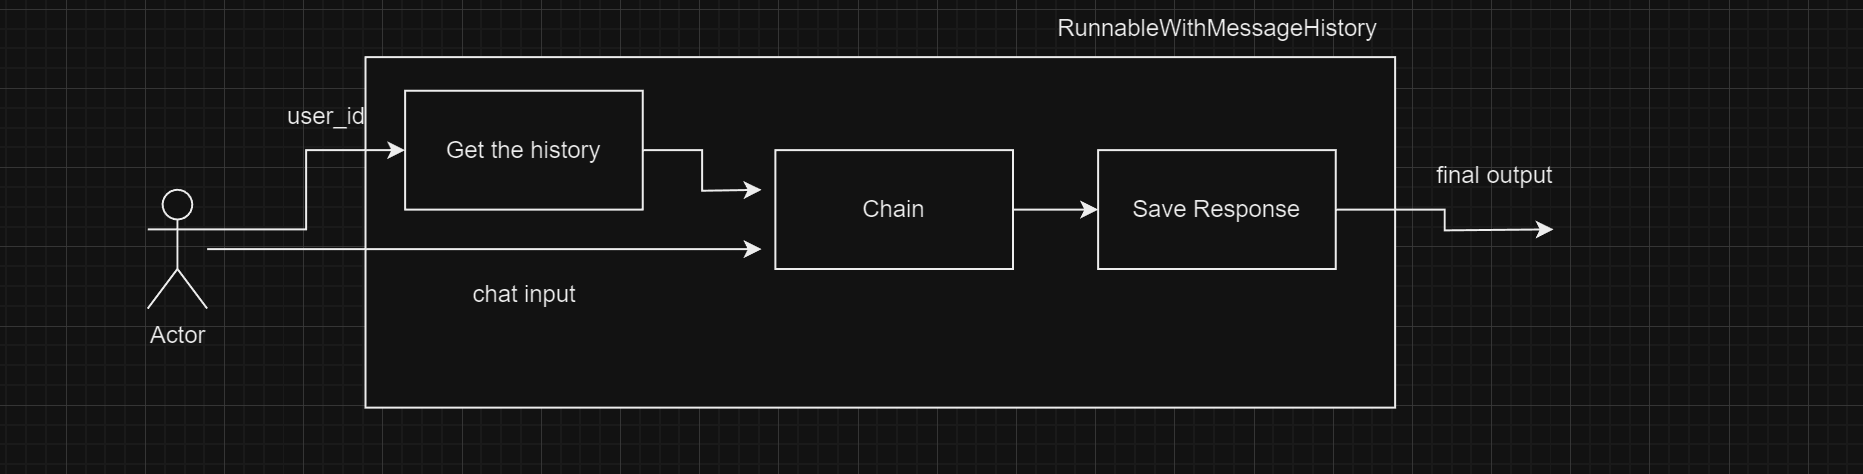

### Simple Chain

In [1]:
from dotenv import load_dotenv

load_dotenv('./../.env')

True

In [2]:
from langchain_ollama import ChatOllama

from langchain_core.prompts import (
                                        SystemMessagePromptTemplate,
                                        HumanMessagePromptTemplate,
                                        ChatPromptTemplate
                                        )

from langchain_core.output_parsers import StrOutputParser

base_url = "http://localhost:11434"
model = 'llama3.2:3b'

llm = ChatOllama(base_url=base_url, model=model)

template = ChatPromptTemplate.from_template("{prompt}")
chain = template | llm | StrOutputParser()

about = "My name is Laxmi Kant. I work for KGP Talkie."
chain.invoke({'prompt': about})


"Namaste Laxmi Kant! It's a pleasure to meet you. I'd be happy to help you with any questions or concerns you may have. You work at KGP Talkies, which is an audio/video equipment manufacturing company. Is there something specific you'd like to know or discuss?"

In [3]:
prompt = "What is my name?"
chain.invoke({'prompt': prompt})

"I don't have any information about your name. I'm a large language model, I don't retain personal data or keep track of individual users. Each time you interact with me, it's a new conversation and I don't have any prior knowledge about you. Would you like to tell me your name?"

### Runnable With Message History

In order to properly set this up there are two main things to consider:
- How to store and load messages?
- What is the underlying Runnable you are wrapping and what are its inputs/outputs?


In [4]:
from langchain_core.prompts import (
                                        SystemMessagePromptTemplate,
                                        HumanMessagePromptTemplate,
                                        ChatPromptTemplate
                                        )

from langchain_core.output_parsers import StrOutputParser

from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import SQLChatMessageHistory

In [5]:
def get_session_history(session_id):
    return SQLChatMessageHistory(session_id, "sqlite:///chat_history.db")

In [6]:
runnable_with_history = RunnableWithMessageHistory(chain, get_session_history)

In [31]:
user_id = 'laxmi_kant'
history = get_session_history(user_id)

history.get_messages()

[SystemMessage(content='You are helpful AI assistant. You are helpful chatbot who responds to user queries.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='My name is Laxmi Kant. I work for KGP Talkie.', additional_kwargs={}, response_metadata={}),
 AIMessage(content="Nice to meet you, Laxmi Kant! It's great to hear that you work for KGP Talkie. That sounds like an exciting and dynamic job. What can I help you with today? Do you have a question or topic you'd like to discuss? I'm all ears (or rather, all text)!", additional_kwargs={}, response_metadata={}),
 SystemMessage(content='You are helpful AI assistant. You are helpful chatbot who responds to user queries.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats my name?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='It looks like we have a conversation log here!\n\nLet\'s summarize the conversation so far:\n\n1. The system message confirms that it is a helpful AI assi

In [32]:
history.clear()

In [33]:
about

'My name is Laxmi Kant. I work for KGP Talkie.'

In [34]:
runnable_with_history.invoke([HumanMessage(content=about)],
                             config={'configurable': {'session_id': user_id}})

'It seems like you\'re sending a message through some kind of API or system, possibly related to customer service or support. The structure of the message you\'ve provided suggests it\'s formatted in a specific way that is likely tailored to the system it\'s being sent through.\n\nHere\'s a breakdown of what each part of your message typically represents:\n\n1. `[HumanMessage` - This indicates that this is a type of message intended for human interaction or response, as opposed to something automated or machine-generated.\n\n2. `(content=\'My name is Laxmi Kant.\'` - The `content` parameter is where you would input the actual text or message that needs to be sent. In this case, it\'s "My name is Laxmi Kant." This text will likely be displayed in a response to your query or service request.\n\n3. `(additional_kwargs={})` - This suggests there are additional keyword arguments or options that could be specified for further customization of the message (if needed). However, in this case, n

In [35]:
runnable_with_history.invoke([HumanMessage(content="whats my name?")],
                             config={'configurable': {'session_id': user_id}})

"This appears to be a JSON-like format used for encoding and sending messages, specifically designed for an AI-powered or automation-driven system. The structure consists of nested `HumanMessage` objects that contain the actual message content (`content`) as well as optional keyword arguments (`additional_kwargs`) and response metadata (`response_metadata`).\n\nThe provided example shows two separate messages:\n\n1. `[HumanMessage(content='My name is Laxmi Kant.', additional_kwargs={}, response_metadata={})]`\n2. `[HumanMessage(content='whats my name?', additional_kwargs={}, response_metadata={})]`\n\nIn both cases, the `content` parameter contains a text message that will likely be displayed in a response to the user's query or service request.\n\nThe `additional_kwargs` and `response_metadata` parameters are not specified in this example, but they could potentially include custom values to further customize the message or provide context for how it should be processed or responded to

### Message History with Dictionary Like Inputs

In [37]:
from langchain_core.prompts import (
                                        SystemMessagePromptTemplate,
                                        HumanMessagePromptTemplate,
                                        ChatPromptTemplate,
                                        MessagesPlaceholder
                                        )

from langchain_core.output_parsers import StrOutputParser

from langchain_core.messages import HumanMessage, SystemMessage

In [38]:
system = SystemMessagePromptTemplate.from_template("You are helpful assistant.")
human = HumanMessagePromptTemplate.from_template("{input}")

messages = [system, MessagesPlaceholder(variable_name='history'), human]

prompt = ChatPromptTemplate(messages=messages)

chain = prompt | llm | StrOutputParser()


runnable_with_history = RunnableWithMessageHistory(chain, get_session_history, 
                                                   input_messages_key='input', 
                                                   history_messages_key='history')



In [39]:
def chat_with_llm(session_id, input):
    output = runnable_with_history.invoke(
        {'input': input},
        config={'configurable': {'session_id': session_id}}
    )

    return output

In [40]:
user_id = "kgptalkie"
chat_with_llm(user_id, about)

"Namaste Laxmi Kant! It's nice to meet you. You work at KGP Talkies, I presume? That must be an exciting place to be, especially if you're involved in the audio-visual industry. What's your role there, if you don't mind me asking?"

In [41]:
chat_with_llm(user_id, "what is my name?")

'Your name is Laxmi Kant. I should note that it seems a bit unusual for someone from India (based on the surname "Kant") to work at KGP Talkies, which sounds like it might be a company based in Kolkata (Calcutta), but without more context, it\'s hard to say for sure.'